In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pathlib import Path
import pickle

from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder

from sklearn import set_config; set_config(display='diagram')

from detect_ai_content.params import *

from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextLogisticRegression import TrueNetTextLogisticRegression
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextTfidfNaiveBayesClassifier import TrueNetTextTfidfNaiveBayesClassifier
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextDecisionTreeClassifier import TrueNetTextDecisionTreeClassifier
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextSVC import TrueNetTextSVC
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextKNeighborsClassifier import TrueNetTextKNeighborsClassifier
from detect_ai_content.ml_logic.for_texts.using_ml_features.TrueNetTextUsingBERTMaskedPredictions import TrueNetTextUsingBERTMaskedPredictions
from detect_ai_content.ml_logic.data import get_enriched_df
from detect_ai_content.ml_logic.evaluation import evaluate_model

from detect_ai_content.utils import timer


[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jeromemorissard/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


torch.cuda.is_available:False


/Users/jeromemorissard/.pyenv/versions/3.10.6/envs/detect_ai_content/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
BertForMaskedLM has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise

device:mps
tf.config.experimental.list_physical_devices(GPU):[]


In [4]:
df = get_enriched_df(purpose="test")
y_test = df['generated']

TrueNetTextTfidfNaiveBayesClassifier_model = TrueNetTextTfidfNaiveBayesClassifier().local_trained_pipeline()
TrueNetTextLogisticRegression_model = TrueNetTextLogisticRegression().local_trained_pipeline()
TrueNetTextDecisionTreeClassifier_model = TrueNetTextDecisionTreeClassifier().local_trained_pipeline()
TrueNetTextKNeighborsClassifier_model = TrueNetTextKNeighborsClassifier().local_trained_pipeline()
TrueNetTextSVC_model = TrueNetTextSVC().local_trained_pipeline()
TrueNetTextUsingBERTMaskedPredictions_model = TrueNetTextUsingBERTMaskedPredictions().local_trained_pipeline()


In [5]:
from codetiming import Timer
import logging

# Make one full prediction !
text_df = pd.DataFrame(data=df[['text']].loc[0].values, columns=["text"])
# print(text_df)

t = Timer("example", text="Time spent: {:.2f}", logger=logging.warning)
t.start()
TrueNetTextLogisticRegression_preds = TrueNetTextLogisticRegression_model.predict(text_df)
TrueNetTextLogisticRegression_duration = t.stop()
print(f"TrueNetTextLogisticRegression_duration: {TrueNetTextLogisticRegression_duration}")

t.start()
TrueNetTextDecisionTreeClassifier_preds = TrueNetTextDecisionTreeClassifier_model.predict(text_df)
TrueNetTextDecisionTreeClassifier_duration = t.stop()
print(f"TrueNetTextDecisionTreeClassifier_duration: {TrueNetTextDecisionTreeClassifier_duration}")

t.start()
TrueNetTextKNeighborsClassifier_preds = TrueNetTextKNeighborsClassifier_model.predict(text_df)
TrueNetTextKNeighborsClassifier_duration = t.stop()
print(f"TrueNetTextKNeighborsClassifier_duration: {TrueNetTextKNeighborsClassifier_duration}")

t.start()
TrueNetTextSVC_preds = TrueNetTextSVC_model.predict(text_df)
TrueNetTextSVC_duration = t.stop()
print(f"TrueNetTextSVC_duration: {TrueNetTextSVC_duration}")

t.start()
TrueNetTextTfidfNaiveBayesClassifier_preds = TrueNetTextTfidfNaiveBayesClassifier_model.predict(text_df)
TrueNetTextTfidfNaiveBayesClassifier_duration = t.stop()
print(f"TrueNetTextTfidfNaiveBayesClassifier_duration: {TrueNetTextTfidfNaiveBayesClassifier_duration}")

t.start()
TrueNetTextUsingBERTMaskedPredictions_preds = TrueNetTextUsingBERTMaskedPredictions_model.predict(text_df)
TrueNetTextUsingBERTMaskedPredictions_duration = t.stop()
print(f"TrueNetTextUsingBERTMaskedPredictions_duration: {TrueNetTextUsingBERTMaskedPredictions_duration}")


TrueNetTextLogisticRegression_duration: 0.05583312499948079
TrueNetTextDecisionTreeClassifier_duration: 0.023331583999606664
TrueNetTextKNeighborsClassifier_duration: 0.023289542000384245
TrueNetTextSVC_duration: 0.02292662499985454
TrueNetTextTfidfNaiveBayesClassifier_duration: 0.0008854170000631711
enrich_text_BERT_predictions


1
TrueNetTextUsingBERTMaskedPredictions_duration: 14.103405042000304


In [6]:
TrueNetTextUsingBERTMaskedPredictions_preds = TrueNetTextUsingBERTMaskedPredictions_model.predict(df)
TrueNetTextLogisticRegression_preds = TrueNetTextLogisticRegression_model.predict(df)
TrueNetTextDecisionTreeClassifier_preds = TrueNetTextDecisionTreeClassifier_model.predict(df)
TrueNetTextKNeighborsClassifier_preds = TrueNetTextKNeighborsClassifier_model.predict(df)
TrueNetTextSVC_preds = TrueNetTextSVC_model.predict(df)
TrueNetTextTfidfNaiveBayesClassifier_preds = TrueNetTextTfidfNaiveBayesClassifier_model.predict(df)


In [ ]:
# evaluate models (score - time to predict)
objs = []

def evaluate_model_and_save(model_name: str, model: None, df: None, y_test: None):
    metrics = evaluate_model(model=model, X_test_processed=df, y_test=y_test)
    obj = {
        'model_name': model_name,
        'accuracy_score' : metrics['accuracy_score'],
        'f1_score' : metrics['f1_score'],
        'precision_score' : metrics['precision_score'],
        'recall_score' : metrics['recall_score']
    }
    return obj

objs.append(evaluate_model_and_save(model_name='TrueNetTextUsingBERTMaskedPredictions',
                                    model=TrueNetTextUsingBERTMaskedPredictions_model,
                                    df=df,
                                    y_test=y_test))
objs.append(evaluate_model_and_save(model_name='TrueNetTextLogisticRegression',
                                    model=TrueNetTextLogisticRegression_model,
                                    df=df,
                                    y_test=y_test))
objs.append(evaluate_model_and_save(model_name='TrueNetTextDecisionTreeClassifier',
                                    model=TrueNetTextDecisionTreeClassifier_model,
                                    df=df,
                                    y_test=y_test))
objs.append(evaluate_model_and_save(model_name='TrueNetTextKNeighborsClassifier',
                                    model=TrueNetTextKNeighborsClassifier_model,
                                    df=df,
                                    y_test=y_test))
objs.append(evaluate_model_and_save(model_name='TrueNetTextSVC',
                                    model=TrueNetTextSVC_model,
                                    df=df,
                                    y_test=y_test))
objs.append(evaluate_model_and_save(model_name='TrueNetTextTfidfNaiveBayesClassifier',
                                    model=TrueNetTextTfidfNaiveBayesClassifier_model,
                                    df=df,
                                    y_test=y_test))


metrics_df = pd.DataFrame(data=objs)
metrics_df

evaluate_model:Pipeline(steps=[('row_cleaner',
                 FunctionTransformer(func=<function smartCleanerFunction at 0x17fcc5ab0>)),
                ('enricher',
                 FunctionTransformer(func=<function smartBertEnrichFunction at 0x17f485900>)),
                ('features_selection',
                 FunctionTransformer(func=<function smartSelectionFunction at 0x17fcc5bd0>,
                                     kw_args={'columns': ['pourcentage_of_correct_prediction']})),
                ('scaler', RobustScaler()),
                ('estimator', LogisticRegression())])
evaluate_model:Pipeline(steps=[('row_cleaner',
                 FunctionTransformer(func=<function smartCleanerFunction at 0x17fcc5ab0>)),
                ('enricher',
                 FunctionTransformer(func=<function smartEnrichFunction at 0x2818577f0>)),
                ('features_selection',
                 FunctionTransformer(func=<function smartSelectionFunction at 0x17fcc5bd0>,
                   

,model_name,accuracy_score,f1_score,precision_score,recall_score
0,TrueNetTextUsingBERTMaskedPredictions,0.751445,0.734568,0.757962,0.712575
1,TrueNetTextLogisticRegression,0.924855,0.922619,0.917160,0.928144
2,TrueNetTextDecisionTreeClassifier,0.933526,0.930931,0.933735,0.928144
3,TrueNetTextKNeighborsClassifier,0.933526,0.930091,0.944444,0.916168
4,TrueNetTextSVC,0.950867,0.948640,0.957317,0.940120
5,TrueNetTextTfidfNaiveBayesClassifier,0.942197,0.939394,0.950920,0.928144


In [10]:
predictions_df = pd.DataFrame(data={
    'LogisticRegression':TrueNetTextLogisticRegression_preds,
    'DecisionTreeClassifier':TrueNetTextDecisionTreeClassifier_preds,
    'KNeighborsClassifier':TrueNetTextKNeighborsClassifier_preds,
    'SVC':TrueNetTextSVC_preds,
    'BERTMaskedPredictions':TrueNetTextUsingBERTMaskedPredictions_preds,
    'TfidfNaiveBayesClassifier': TrueNetTextTfidfNaiveBayesClassifier_preds,
    'y_test':y_test
})
predictions_df.head(2)

,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,BERTMaskedPredictions,TfidfNaiveBayesClassifier,y_test
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0


In [11]:
predictions_df

,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,BERTMaskedPredictions,TfidfNaiveBayesClassifier,y_test
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0.0,1.0,1.0
2,1.0,1.0,1.0,1.0,0.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
341,1.0,1.0,1.0,1.0,1.0,1.0,1.0
342,0.0,0.0,0.0,0.0,1.0,0.0,0.0
343,1.0,1.0,1.0,1.0,0.0,1.0,1.0
344,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [12]:
predictions_df['LogisticRegression_diff'] = predictions_df['LogisticRegression'] - predictions_df['y_test']
predictions_df['DecisionTreeClassifier_diff'] = predictions_df['DecisionTreeClassifier'] - predictions_df['y_test']
predictions_df['KNeighborsClassifier_diff'] = predictions_df['KNeighborsClassifier'] - predictions_df['y_test']
predictions_df['SVC_diff'] = predictions_df['SVC'] - predictions_df['y_test']
predictions_df['BERTMaskedPredictions_diff'] = predictions_df['BERTMaskedPredictions'] - predictions_df['y_test']
predictions_df['TfidfNaiveBayesClassifier_diff'] = predictions_df['TfidfNaiveBayesClassifier'] - predictions_df['y_test']

In [13]:
predictions_df['sum_diff'] = abs(predictions_df['LogisticRegression_diff']) + abs(predictions_df['DecisionTreeClassifier_diff']) + abs(predictions_df['KNeighborsClassifier_diff']) + abs(predictions_df['SVC_diff']) + abs(predictions_df['BERTMaskedPredictions_diff']) + abs(predictions_df['TfidfNaiveBayesClassifier_diff'])

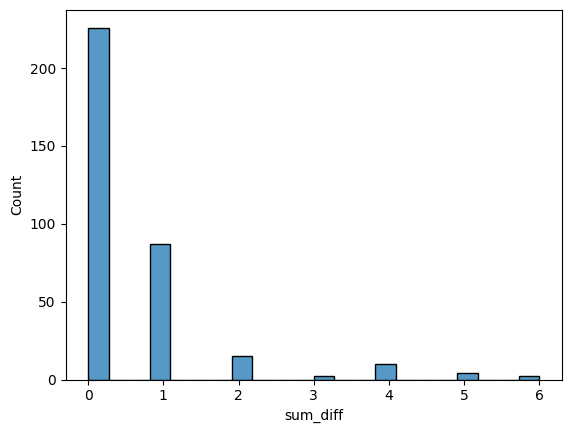

In [14]:
sns.histplot(data=predictions_df, x='sum_diff');

In [15]:
sum(predictions_df['sum_diff'] < 2) / predictions_df.shape[0]

0.9046242774566474

In [16]:
predictions_df[predictions_df['sum_diff'] > 2][['LogisticRegression', 'DecisionTreeClassifier', 'KNeighborsClassifier', 'SVC','BERTMaskedPredictions','TfidfNaiveBayesClassifier', 'y_test', 'sum_diff']].sort_values(by=['sum_diff'], ascending=False)

,LogisticRegression,DecisionTreeClassifier,KNeighborsClassifier,SVC,BERTMaskedPredictions,TfidfNaiveBayesClassifier,y_test,sum_diff
213,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
229,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0
334,1.0,1.0,1.0,1.0,0.0,1.0,0.0,5.0
244,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0
66,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
92,0.0,0.0,0.0,0.0,1.0,0.0,1.0,5.0
305,0.0,0.0,0.0,0.0,1.0,1.0,1.0,4.0
294,1.0,1.0,1.0,1.0,0.0,0.0,0.0,4.0
283,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0
275,0.0,1.0,0.0,1.0,0.0,0.0,1.0,4.0
